The Following NNotebook contains the program described in the video along with my twist on the program to make the model more accurate and efficient.

In [90]:
#program to predict diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [91]:
#load the data
df = pd.read_csv("diabetes.csv")


In [92]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [94]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [95]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

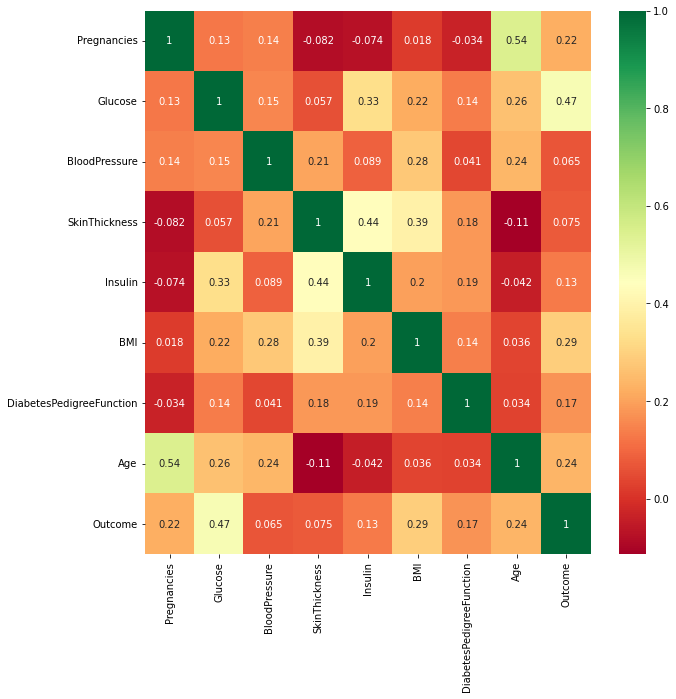

In [96]:
#check the correlation

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")


[Text(0.5, 0, 'Pregnancies')]

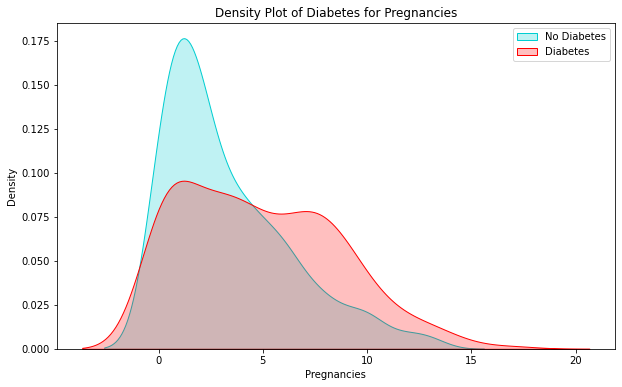

In [97]:
# explore pregnancy and target
plt.figure(figsize=(10,6))

# plotting density plot for pregnancies and target
kde = sns.kdeplot(df['Pregnancies'][df['Outcome'] == 0], color="darkturquoise", shade=True)
kde = sns.kdeplot(df['Pregnancies'][df['Outcome'] == 1], color="red", shade=True)
plt.legend(['No Diabetes', 'Diabetes'])
plt.title('Density Plot of Diabetes for Pregnancies')
kde.set(xlabel='Pregnancies')


[Text(0.5, 0, 'Glucose')]

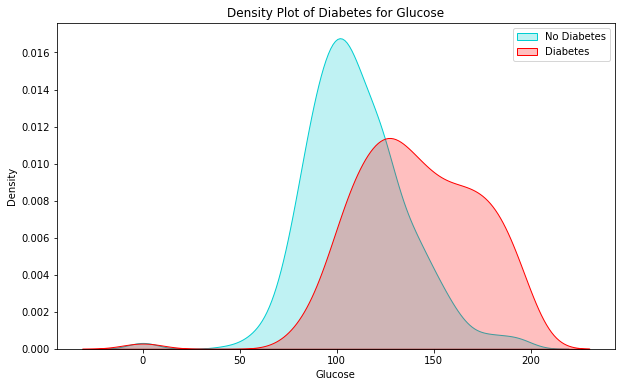

In [98]:
# explore glucose and target
plt.figure(figsize=(10,6))

# plotting density plot for glucose and target
kde = sns.kdeplot(df['Glucose'][df['Outcome'] == 0], color="darkturquoise", shade=True)
kde = sns.kdeplot(df['Glucose'][df['Outcome'] == 1], color="red", shade=True)
plt.legend(['No Diabetes', 'Diabetes'])
plt.title('Density Plot of Diabetes for Glucose')
kde.set(xlabel='Glucose')


Text(0.5, 1.0, 'Violin Plot of Diabetes for Glucose')

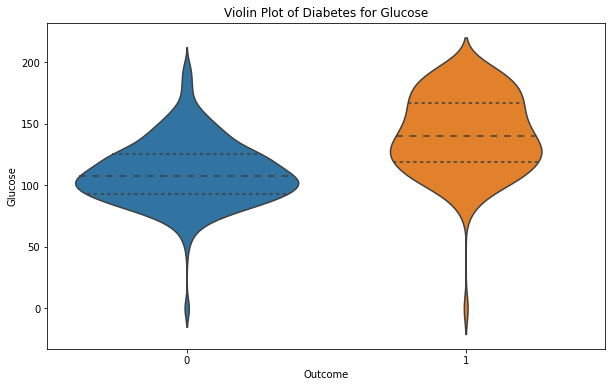

In [99]:
# exploring glucose and target with violin plot
plt.figure(figsize=(10,6))
sns.violinplot(x="Outcome", y="Glucose", data=df, split=True, inner="quart")
plt.title('Violin Plot of Diabetes for Glucose')



In [100]:
# REPLACE ZEROS WITH MEAN/MEADIAN OF TEH RESPECTIVE FEATURES

#glucose
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].median())

#blood pressure
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())

#bmi
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

#insulin
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())

#skin thickness
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())



In [101]:
#splliting the dependent and independent variables
X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']


In [102]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126,60.0,20.536458,79.799479,30.1,0.349,47


In [103]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [104]:
#splitting the data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [105]:
#KNN
from sklearn.neighbors import KNeighborsClassifier


In [106]:
traning_accuracy = []
test_accuracy = []

for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    traning_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

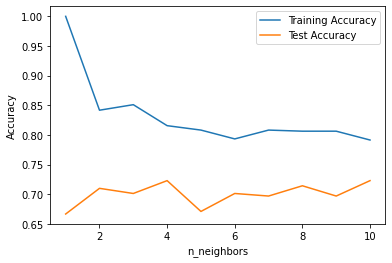

In [107]:
plt.plot(range(1,11), traning_accuracy, label="Training Accuracy")
plt.plot(range(1,11), test_accuracy, label="Test Accuracy")
plt.legend()
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.show()

In [108]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print("Accuracy of KNN on training set: {:.2f}".format(knn.score(X_train, y_train)))
print("Accuracy of KNN on test set: {:.2f}".format(knn.score(X_test, y_test)))


Accuracy of KNN on training set: 0.81
Accuracy of KNN on test set: 0.70


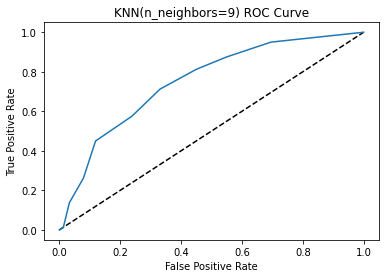

In [109]:
#roc curve
from sklearn.metrics import roc_curve

y_pred_prob = knn.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label="KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN(n_neighbors=9) ROC Curve")
plt.show()


In [110]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [111]:
print("Accuracy of Decision Tree on training set: {:.2f}".format(dtree.score(X_train, y_train)))
print("Accuracy of Decision Tree on test set: {:.2f}".format(dtree.score(X_test, y_test)))


Accuracy of Decision Tree on training set: 1.00
Accuracy of Decision Tree on test set: 0.72


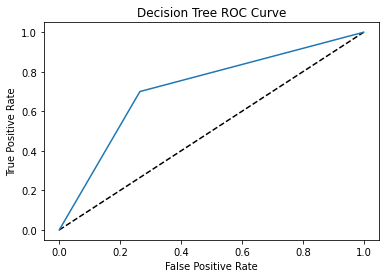

In [112]:
#Roc curve
y_pred_prob = dtree.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label="Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.show()

In [113]:
dtree = DecisionTreeClassifier(random_state=0,max_depth=4)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

In [114]:
print("Accuracy of Decision Tree on training set: {:.2f}".format(dtree.score(X_train, y_train)))
print("Accuracy of Decision Tree on test set: {:.2f}".format(dtree.score(X_test, y_test)))


Accuracy of Decision Tree on training set: 0.80
Accuracy of Decision Tree on test set: 0.70


In [115]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy of MLP on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy of MLP on test set: {:.2f}".format(mlp.score(X_test, y_test)))


Accuracy of MLP on training set: 0.76
Accuracy of MLP on test set: 0.70


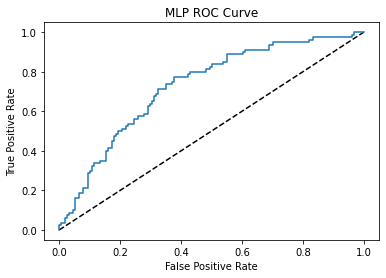

In [116]:
#Roc curve
y_pred_prob = mlp.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label="MLP")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("MLP ROC Curve")
plt.show()

In [117]:
# scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [118]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print("Accuracy of KNN on training set: {:.2f}".format(knn.score(X_train_scaled, y_train)))
print("Accuracy of KNN on test set: {:.2f}".format(knn.score(X_test_scaled, y_test)))

Accuracy of KNN on training set: 0.82
Accuracy of KNN on test set: 0.71


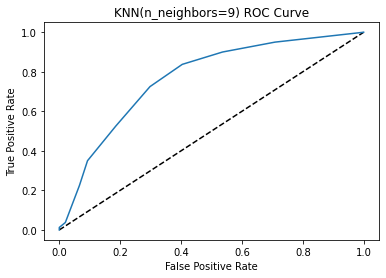

In [119]:
#roc curve

y_pred_prob = knn.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label="KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN(n_neighbors=9) ROC Curve")
plt.show()


In [120]:
#decision tree
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train_scaled, y_train)

print("Accuracy of Decision Tree on training set: {:.2f}".format(dtree.score(X_train_scaled, y_train)))
print("Accuracy of Decision Tree on test set: {:.2f}".format(dtree.score(X_test_scaled, y_test)))



Accuracy of Decision Tree on training set: 1.00
Accuracy of Decision Tree on test set: 0.73


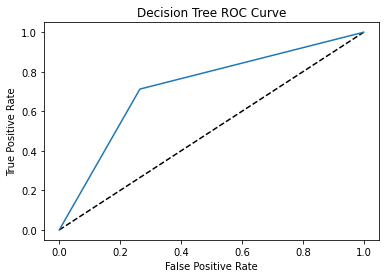

In [121]:
#roc curve
y_pred_prob = dtree.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label="Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.show()


In [122]:
mlp = MLPClassifier(random_state=0, max_iter=2048)
mlp.fit(X_train_scaled, y_train)

print("Accuracy of MLP on training set: {:.2f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy of MLP on test set: {:.2f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy of MLP on training set: 0.99
Accuracy of MLP on test set: 0.71


c:\Users\rathn\anaconda3\envs\DataMining\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2048) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


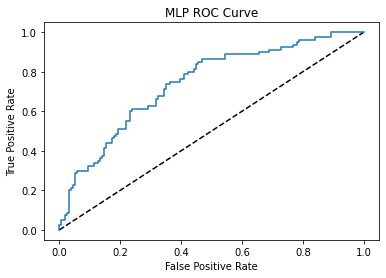

In [123]:
#Roc curve
y_pred_prob = mlp.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label="MLP")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("MLP ROC Curve")
plt.show()



MY attempt at improving the program:

In [124]:
#svm classifier
from sklearn.svm import SVC

svm = SVC(random_state=0)
svm.fit(X_train, y_train)

print("Accuracy of SVM on training set: {:.2f}".format(svm.score(X_train, y_train)))
print("Accuracy of SVM on test set: {:.2f}".format(svm.score(X_test, y_test)))


Accuracy of SVM on training set: 0.78
Accuracy of SVM on test set: 0.74


In [125]:
#naive bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

print("Accuracy of Naive Bayes on training set: {:.2f}".format(nb.score(X_train_scaled, y_train)))
print("Accuracy of Naive Bayes on test set: {:.2f}".format(nb.score(X_test_scaled, y_test)))

Accuracy of Naive Bayes on training set: 0.76
Accuracy of Naive Bayes on test set: 0.74


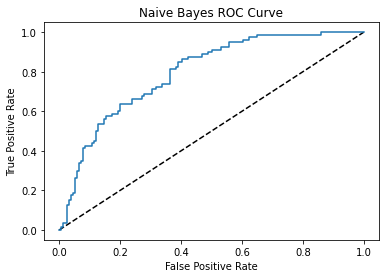

In [126]:
#roc curve
y_pred_prob = nb.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label="Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes ROC Curve")
plt.show()


In [127]:
legacy_models = []

legacy_models.append(knn)
legacy_models.append(dtree)
legacy_models.append(svm)
legacy_models.append(nb)

In [128]:
meta_features = np.empty((len(X), len(legacy_models)))  # Array to store meta-features

In [129]:
for i, model in enumerate(legacy_models):
    predictions = model.predict(X)
    meta_features[:, i] = predictions

In [130]:
X_meta = pd.DataFrame(meta_features, columns=['legacy_model_{}'.format(i+1) for i in range(len(legacy_models))])


In [131]:
meta_classifier = MLPClassifier(hidden_layer_sizes=(10,),max_iter=1024)  # Customize the hidden layer sizes as desired
meta_classifier.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=1024)

In [132]:
#traning and testing accuracy
meta_predictions = meta_classifier.predict(X_test_scaled)
print("Accuracy of Meta Classifier on training set: {:.2f}".format(meta_classifier.score(X_train_scaled, y_train)))
print("Accuracy of Meta Classifier on test set: {:.2f}".format(meta_classifier.score(X_test_scaled, y_test)))


Accuracy of Meta Classifier on training set: 0.80
Accuracy of Meta Classifier on test set: 0.76


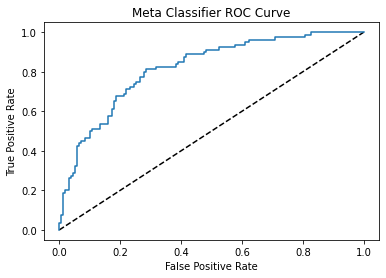

In [133]:
#roc curve
y_pred_prob = meta_classifier.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label="Meta Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Meta Classifier ROC Curve")
plt.show()

simple ui to allow user to input data and get a prediction from the meta model.

In [134]:
import tkinter as tk
from tkinter import messagebox

In [135]:
def classify():
    #defining the user input
    user_input = [float(entry.get()) for entry in entries]
    meta_prediction = meta_classifier.predict([user_input])

    if meta_prediction[0] == 1:
        messagebox.showinfo("Prediction Result", f"The predicted outcome is: {meta_prediction[0]}. You are diabetic.")
    else:
        messagebox.showinfo("Prediction Result", f"The predicted outcome is: {meta_prediction[0]}. You are not diabetic.")

  
window = tk.Tk()
window.title("Diabetes Predictor")

labels = ['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin', 'BMI',
          'Diabetes Pedigree Function', 'Age']
entries = []


for i, label in enumerate(labels):
    tk.Label(window, text=label).grid(row=i, column=0, sticky='e')
    entry = tk.Entry(window)
    entry.grid(row=i, column=1)
    entries.append(entry)

# Create a button to trigger the classification
classify_button = tk.Button(window, text="Classify", command=classify)
classify_button.grid(row=len(labels), column=0, columnspan=2)



In [136]:
# uncomment the below to run the UI
# window.mainloop()

Extra trees classifier generally performs better therefore im testing it out to see if it improves the accuracy of the model.

Accuracy of Extra Trees Classifier on training set: 1.00
Accuracy of Extra Trees Classifier on test set: 0.71


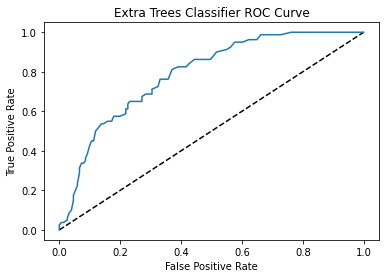

In [137]:

# extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(X_train_scaled, y_train)

print("Accuracy of Extra Trees Classifier on training set: {:.2f}".format(etc.score(X_train_scaled, y_train)))
print("Accuracy of Extra Trees Classifier on test set: {:.2f}".format(etc.score(X_test_scaled, y_test)))

#roc curve
y_pred_prob = etc.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label="Extra Trees Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extra Trees Classifier ROC Curve")
plt.show()


Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set: 0.74


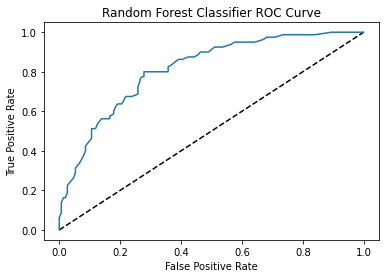

In [138]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train_scaled, y_train)

print("Accuracy of Random Forest Classifier on training set: {:.2f}".format(rfc.score(X_train_scaled, y_train)))
print("Accuracy of Random Forest Classifier on test set: {:.2f}".format(rfc.score(X_test_scaled, y_test)))

#roc curve
y_pred_prob = rfc.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label="Random Forest Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier ROC Curve")

plt.show()

But random forest performs better in this case so, it differs from dataset to dataset.